## DTSA 5509 - Supervised Learning  - Final Project
JF Schultz, Aug 2023  
Objective:  Identify a Supervised Learning problem, perform Exploratory Data Analysis, prediction analysis (model building and training) with results and discussion/conclusion.

## Overview  
[Problem Description](#problem-description)  
[Exploratory Data Analysis](#exploratory-data-analysis)  
[Data Cleaning and Feature Engineering](#data-cleaning-and-feature-engineering)  
[Models and Results](#models-and-results)  
[Model Optimization](#model-optimization-and-parameter-tuning)  
[Discussion](#discussion)

## Problem Description

The Kaggle Titanic Survival Prediction is a classic Supervised Learning problem.  The goal of the learning problem is to predict individual passenger survival.

Background:  The sinking of the Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.  While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Survival prediction is a binary classification problem well suited for evaluation with Supervised Learning techniques.  Survival is based on individual passenger characteristics as described below.

The following project examines the findings of Exploratory Data Analyis, describes the Data Cleaning and Feature Engingeering process, demonstrates the application of Supervised Learning techniques and algorithms to build various models, compares model results, and discusses the models' relative merits.

The dataset is available from [kaggle.com](https://www.kaggle.com/datasets/yasserh/titanic-dataset).  Data definitions and descriptions are discussed below.  Utilization of the kaggle dataset has an added benefit.  Typically, various holdout techniques are used to evaluate model training accuracy.  Kaggle also provides an additional test set with unkown outcomes which can be used to measure true test accuracy.  

## Exploratory Data Analysis

This section describes the Exploratoy Data process, Data Description, Data Cleaning, Feature Selection, and Feature Engineering.  Summary and Discussion are located at the end of the section.

The following approach was used in Exploratory Data Analysis with details and results shown below:  
- Identify number of observations and variables
- Identify the variables and their data types
- Data Desciption
- Examine the distribution of the variables
- Examine relationships between outcome measure and features
- Identify variables with missing values
- EDA Summary
- Data Cleaning:  Challenges and Solutions  

In [1]:
# load packages and import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data
test_set = pd.read_csv('data/test.csv')  # Note the test set is used to test model and submit predictions to kaggle for scoring
df = pd.read_csv('data/train.csv')

In [2]:
# variables and data types
print('The dataset is size (observations, variables): ', df.shape, '\n')
print('The variables are:', *list(df.columns), '\n')

print('The variable types are as follows:\n')
print(df.info())

The dataset is size (observations, variables):  (891, 12) 

The variables are: PassengerId Survived Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked 

The variable types are as follows:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


The dataset has 891 observations.  There is an outcome variable 'Survived' and 11 other associated variables per observation.  Their data description is as follows:  

**Data Dictionary**  

**Variable:  Definition; Key**  
PassengerId:  passenger ID number  
Survived:  Survival; 0 = No, 1 = Yes  
Pclass:  Ticket class; 1 = 1st, 2 = 2nd, 3 = 3rd  
Name:  passenger name  
Sex:  Gender  
Age:  Age; in years  
Sibsp:  # of siblings / spouses aboard the Titanic  
Parch:  # of parents / children aboard the Titanic  
Ticket:  Ticket number  
Fare:  Passenger fare  
Cabin:  Cabin number  
Embarked	Port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton  

**Variable Notes**  
Pclass: A proxy for socio-economic status (SES); 1st = Upper 2nd = Middle 3rd = Lower  
Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  
Sibsp: The dataset defines family relations in this way...  
&nbsp;&nbsp;&nbsp;&nbsp;Sibling = brother, sister, stepbrother, stepsister  
&nbsp;&nbsp;&nbsp;&nbsp;Spouse = husband, wife (mistresses and fiancés were ignored)  
Parch: The dataset defines family relations in this way...  
&nbsp;&nbsp;&nbsp;&nbsp;Parent = mother, father  
&nbsp;&nbsp;&nbsp;&nbsp;Child = daughter, son, stepdaughter, stepson  
&nbsp;&nbsp;&nbsp;&nbsp;Some children travelled only with a nanny, therefore parch=0 for them.  

Preliminary exploration of the data was performed to evaluate the distribution and characteristics of the variables.  Data Cleaning is discussed further below.  Certain variables are excluded due to lack of relevance ('PassengerID', 'Ticket') or high number of missing values and/or limited usefulness ('Cabin').  The distribution of the variables is described visually below.  The variables demonstrate good variability, an important component to usefulness in predictive modeling.

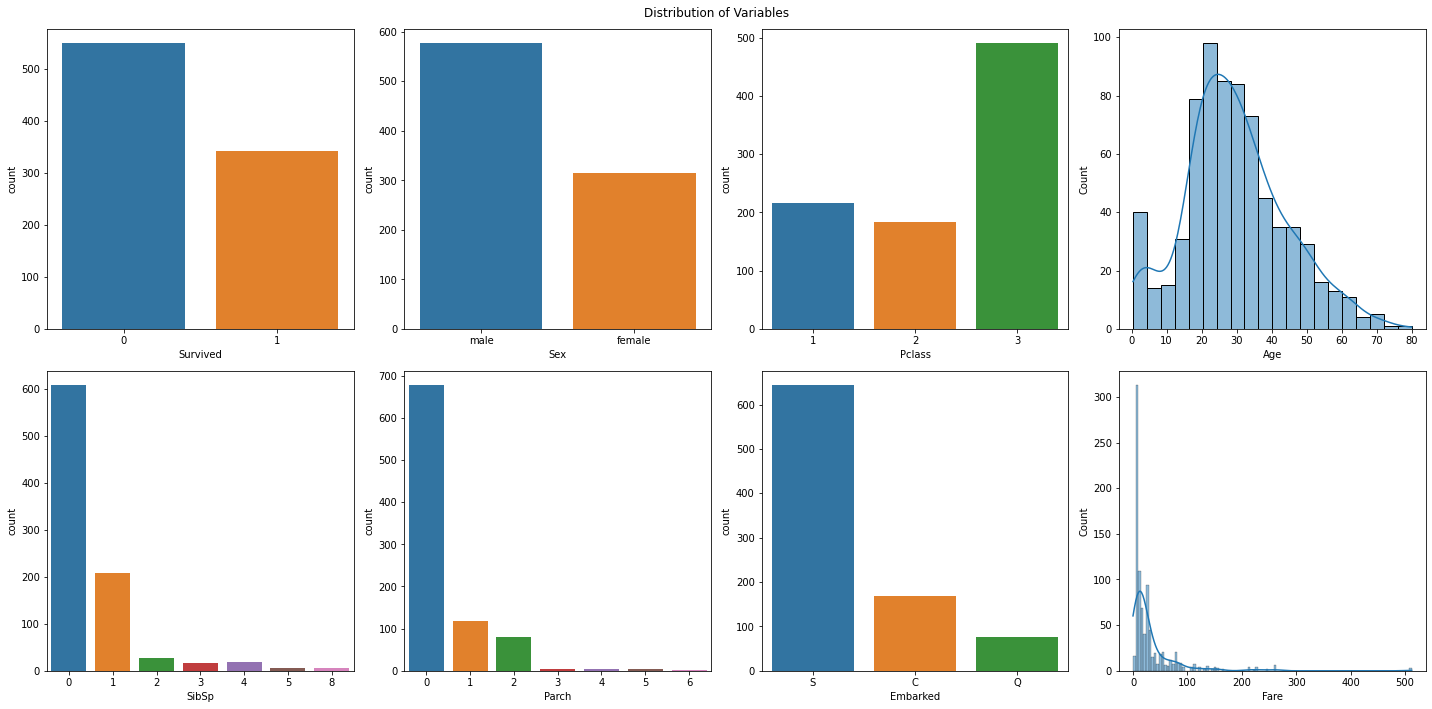

In [35]:
# distribution of variables
# print(df.groupby('Survived')['Survived'].count())
fig, axs = plt.subplots(2, 4, figsize=(20,10))  # optional arg  sharey=True
fig.suptitle('Distribution of Variables')

sns.countplot(ax=axs[0, 0], data=df, x='Survived')
sns.countplot(ax=axs[0, 1], data=df, x='Sex')
sns.countplot(ax=axs[0, 2], data=df, x='Pclass')
sns.countplot(ax=axs[1, 0], data=df, x='SibSp')
sns.countplot(ax=axs[1, 1], data=df, x='Parch')
sns.countplot(ax=axs[1, 2], data=df, x='Embarked')

#sns.displot(ax=axs[3], data=df, x='Age', kind='hist', kde=True)
sns.histplot(ax=axs[0, 3], data=df, x='Age', kde=True)
sns.histplot(ax=axs[1, 3], data=df, x='Fare', kde=True)

fig.tight_layout()
plt.show()

Preliminary analysis was performed to examine the relationship of the outcome variable with associated features.

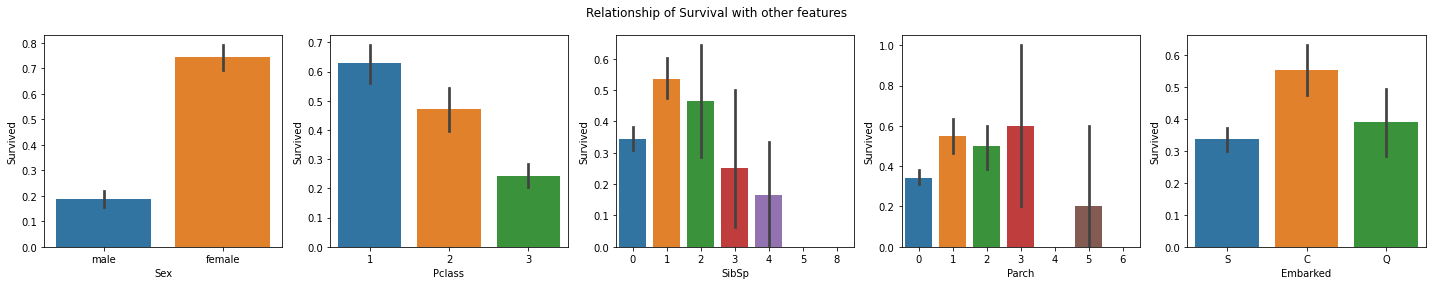

In [36]:
# variable relationships - survival ~ others
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Relationship of Survival with other features')

sns.barplot(ax=axs[0], data=df, x='Sex', y='Survived')
sns.barplot(ax=axs[1], data=df, x='Pclass', y='Survived')
sns.barplot(ax=axs[2], data=df, x='SibSp', y='Survived')
sns.barplot(ax=axs[3], data=df, x='Parch', y='Survived')
sns.barplot(ax=axs[4], data=df, x='Embarked', y='Survived')

fig.tight_layout()
plt.show()

Examination of the relationship between survival and age requires additional data preparation.  A simple plot visualization of individual survival with individual age is uninformative.  In order to better understand the relationship, observations were discretized (or categorized) by age into age groups and mean survival outcome for the group determined.

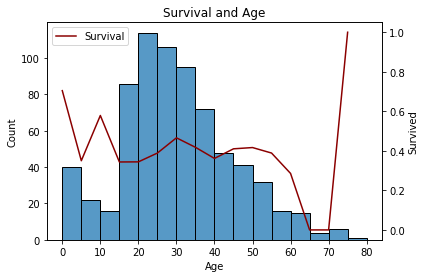

In [37]:
# variable relationship - survival ~ age
groups = pd.cut(df['Age'], bins=np.arange(0,85,5))
svpct = df.groupby(groups)['Survived'].mean()

ax1 = sns.histplot(data=df, x='Age', bins=np.arange(0,85,5), label='Age')
ax2 = ax1.twinx()
sns.lineplot(x=np.arange(0,80,5), y=svpct, ax=ax2, color='darkred', label='Survival')

# fig.legend(['First line', 'Second line'])
plt.title('Survival and Age')
plt.show()

The appropriate binning method for age was evaluated further.  The above method with binning by decades seems intuitive.  However, it is still arbitrary and artificial.  More meaningful grouping and age separation was developed as discussed later with Feature Engineering.  The relationship of survival to more meaningful age groupings is shown below:

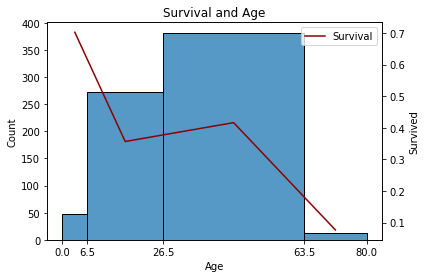

Age group categories: ['child', 'young', 'adult', 'elder']


In [38]:
# variable relationship - survival ~ age

# bins = np.array([0, 2, 10, 18, 30, 50, 80])
# bin_names = ['infant', 'youth', 'adolescent', 'adult', 'older', 'senior']

age_bins = np.array([0, 6.5, 26.5, 63.5, 80])
age_bin_names = ['child', 'young', 'adult', 'elder']

groups = pd.cut(df['Age'], bins=age_bins)
svpct = df.groupby(groups)['Survived'].mean()

ax1 = sns.histplot(data=df, x='Age', bins=age_bins, label='Age')
ax2 = ax1.twinx()

bin_mean_ages = []
for i in range(len(age_bins)-1):
    bin_mean_ages.append((age_bins[i] + age_bins[i+1])/2)
sns.lineplot(x=bin_mean_ages, y=svpct, ax=ax2, color='darkred', label='Survival')

plt.xticks(age_bins)
plt.title('Survival and Age')
plt.show()
print('Age group categories:', list(age_bin_names))

The data were examined for missing or null values.  Three variables with missing values were identified ('Age', 'Cabin', 'Embarked') as noted below and addressed with Data Cleaning.

In [39]:
# identify missing values
nans = pd.isna(df).sum()
print('Missing Values Counts:')
print(nans.iloc[np.where(nans != 0)])

# sns.heatmap(df.isnull(), cbar=False)
# plt.show()

Missing Values Counts:
Age         177
Cabin       687
Embarked      2
dtype: int64


Embarked had only two missing values and these observatons could reasonably be excluded from the dataset given the small number observations wtih missing values.  Cabin had an very large number of missing values (687/891) which did not seem feasbile to reliably impute and was excluded as a variable.  On preliminary analysis, Age seemed to be relevant and important to survival prediction, and had a reaonable number of values to impute.  Further analysis was perfomed in order to determine a reasonable method to impute missing age values.  The relationship of age with other variables was examined for association and correlation to determine if other variables would be reasonable determinants to impute missing age values.  The relationship of age with other variables is shown below:

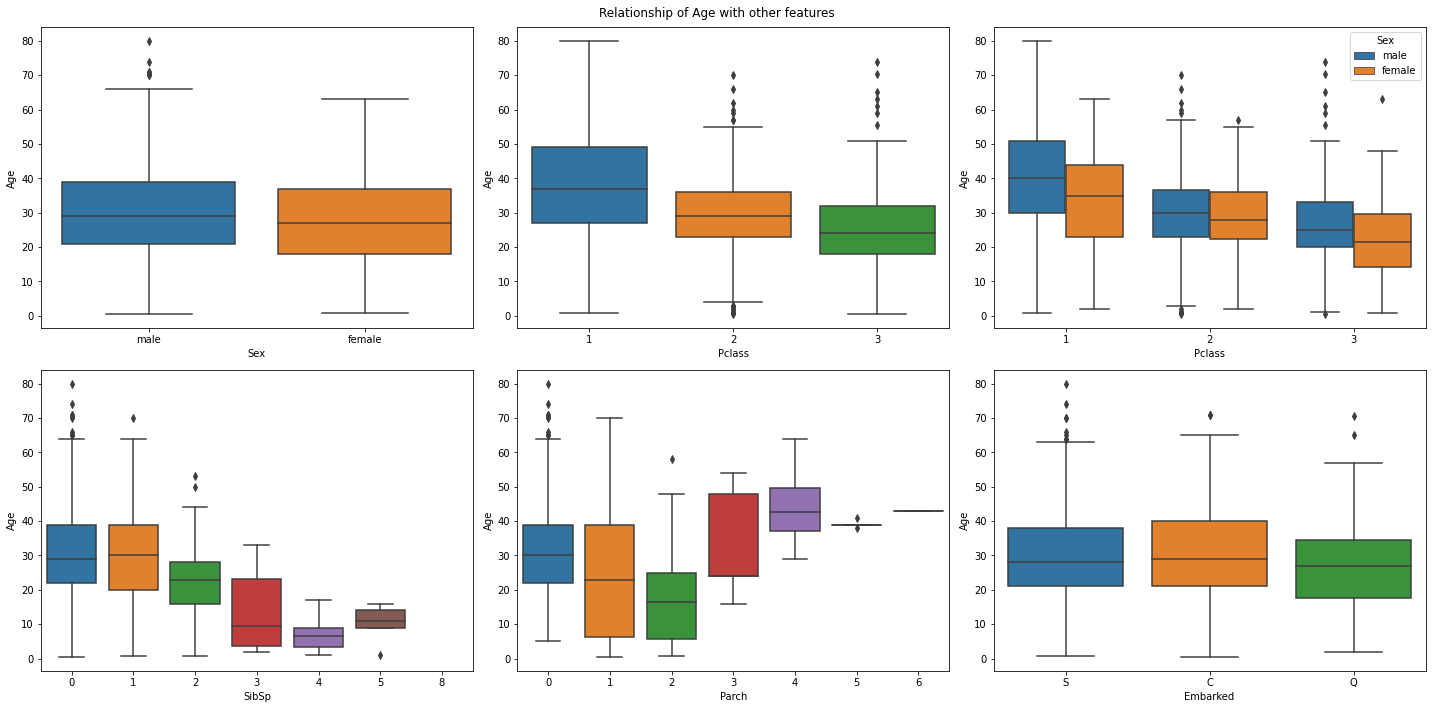

In [40]:
# variable relationships - age ~ others
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Relationship of Age with other features')

sns.boxplot(ax=axs[0, 0], data=df, x='Sex', y='Age')
sns.boxplot(ax=axs[0, 1], data=df, x='Pclass', y='Age')
sns.boxplot(ax=axs[0, 2], data=df, x='Pclass', y='Age', hue='Sex')
sns.boxplot(ax=axs[1, 0], data=df, x='SibSp', y='Age')
sns.boxplot(ax=axs[1, 1], data=df, x='Parch', y='Age')
sns.boxplot(ax=axs[1, 2],data=df, x='Embarked', y='Age')

fig.tight_layout()
plt.show()

#### EDA Summary  

- 891 observations  
- Outcome variable: Survived (342 survived / 891 total)   
- 11 variable features:  PassengerID, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked  
  - 4 uninformative variables:  PassengerID, Ticket, Name, Cabin  
  - 7 informative variable:  Pclass, Sex, Age, SibSp, Parch, Fare, Embarked  
- Distribution of variables - variations within each variable
- Outcome relation to variables - Sex, Pclass, SibSp, Parch, Embarked, Age (Fare excluded)
- Missing values:  Age (177), Cabin (687), Embarked (2)
  - Cabin - too many missing values (687 / 891) - exclude feature
  - Embarked - minimal (2) missing observations - exclude observations, include feature
  - Age - appears to be relevant feature, too many observations to exclude, determine method to impute values
- Relation of Age with other features

## Data Cleaning and Feature Engineering

The following approach and technical details were used in Data Cleaning and Feature Engineering

- Data Cleaning - exclude observations with missing Embarked values
- Feature Exclusion - PassengerID, Ticket, Name, Cabin, Fare
- Selected Features - Pclass, Sex, Age, SibSp, Parch, Embarked
- Data Cleaning - impute missing ages from mean of group with same Sex and Pclass
- Feature Engingeering
    - Age Grouping
    - SibSp and Parch Grouping


In [41]:
# drop Embarked NaNs
df.dropna(axis=0, subset = ['Embarked'], inplace=True)
df.reset_index(drop=True, inplace=True)
print("'Embarked' NaNs:", pd.isna(df['Embarked']).sum())

'Embarked' NaNs: 0


In [42]:
# impute Age

print("'Age' NaNs:", pd.isna(df['Age']).sum())

ages = []
idx = np.where(df['Age'].isna())[0]
for i in idx:
    age = df[(df['Pclass'] == df.iloc[i]['Pclass']) & (df['Sex'] == df.iloc[i]['Sex'])]['Age'].mean()
    ages.append(round(age, 2))
df.loc[idx,'Age'] = ages    # df.iloc[idx]['Age'] = ages

print("'Age' NaNs:", pd.isna(df['Age']).sum())

'Age' NaNs: 177
'Age' NaNs: 0


As previously discussed, binning of age by decades is arbitrary.  In order to determine a more meaningful and relevant binning for age groups and categories, a Decision Tree Classifier was fit based on age alone with survival outcome (detailed elsewhere).  The Decision Tree Classifier consistently determined the approximate age bins used.  The visualization of survival outcomes based on these bins is shown above under Exploratory Data Analysis, and noted here:

In [43]:
# Categorize / Discretize Age

# assign 'category' of Age to new var 'Age_group'

print('bins:', list(age_bins), 'labels', list(age_bin_names))
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_bin_names)
df.groupby('AgeGroup')['AgeGroup'].count()

bins: [0.0, 6.5, 26.5, 63.5, 80.0] labels ['child', 'young', 'adult', 'elder']


AgeGroup
child     47
young    314
adult    515
elder     13
Name: AgeGroup, dtype: int64

Analysis and Feature Engineering based upon SibSp and Parch was performed (details elsewhere).  Various methods of feature engineering were tried and tested including: categorization based on ungrouped values for SipSp and Parch independently, simplified total count of SibSp and Parch ('Group Size'), categorization and grouping based on SibSp and Parch combined ('Companions'), and as a simplified factor ('alone', 'duo', 'multi').  All the engineered features seemed to perform similarly.  A Decision Tree Classifer was used to determine the best groupings based on group size and suggested: 1 (alone), 2-3 (small), 4 (quad), 5+ (large).  Fitting models on the training set with these groupings appeared to have the best results.

In [2]:
# Categorize GroupSize into dtc categories

df['GroupSize'] = 1 + df['SibSp'] + df['Parch']

conditions = [
    df['GroupSize'] == 1,
    df['GroupSize'] == 2,
    df['GroupSize'] == 3,
    df['GroupSize'] == 4,
    df['GroupSize'] > 4
]
values = ['alone', 'small', 'small', 'quad', 'large']

df['GroupDesc'] = np.select(conditions, values)
df.groupby('GroupDesc')['GroupDesc'].count()

GroupDesc
alone    537
large     62
quad      29
small    263
Name: GroupDesc, dtype: int64

The distiburition of the engineered features and relationship with survival is shown below:

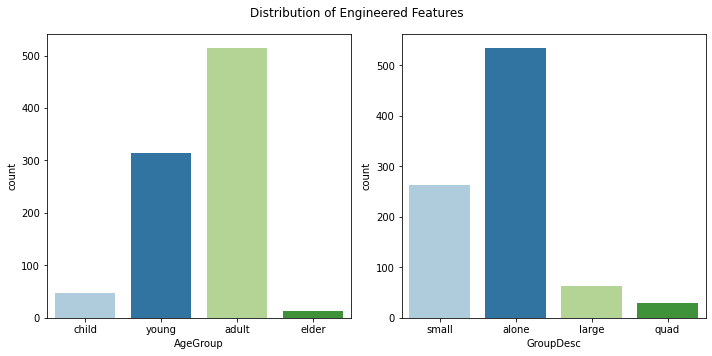

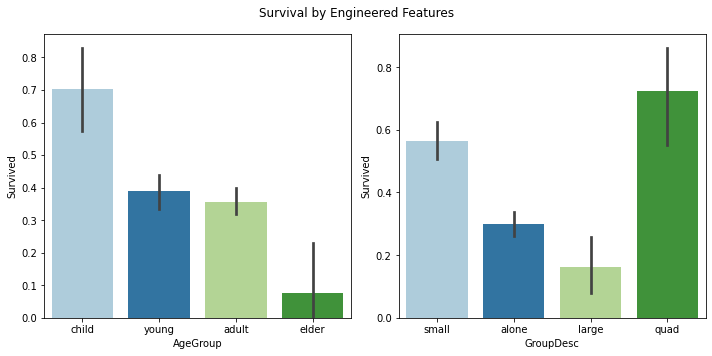

In [45]:
# visualizations

fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(ax=axs[0], data=df, x='AgeGroup', palette='Paired')
sns.countplot(ax=axs[1], data=df, x='GroupDesc', palette='Paired')

fig.suptitle('Distribution of Engineered Features')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.barplot(ax=axs[0], data=df, x='AgeGroup', y='Survived', palette='Paired')
sns.barplot(ax=axs[1], data=df, x='GroupDesc', y='Survived', palette='Paired')

fig.suptitle('Survival by Engineered Features')
plt.tight_layout()
plt.show()

## Models and Results

In [46]:
from patsy import dmatrix, dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

The following Supervised Learning teachniques were used to create prediction models.  Each model was tested for training accuracy by using k-fold cross-validation.  

- Logistic Regression
- K Nearest Neighbors
- Decision Tree Classifier
- Random Forest
- AdaBoost
- Gradient Boosting
- Support Vector Machine

Note that the logistic regression model requires a slightly different construct of input data. The patsy module is used to facilitate the construction of the design matrix for regression.

In [47]:
# build X, y datasets for modeling

y = df['Survived']
X = df.copy()

X.drop(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'GroupSize'], axis=1, inplace=True)
X = pd.get_dummies(X, columns = ['Pclass', 'Sex', 'AgeGroup', 'GroupDesc', 'Embarked'])

In [48]:
# build classifier models

clf_candidates = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), SVC()]
results = pd.DataFrame(columns = ['Model', 'CV-train'])

for clf in clf_candidates:
    cv = cross_val_score(clf, X, y, scoring='accuracy', cv=None, n_jobs=-1)      # default cv 'None' is 5-fold
    # print(clf.__class__.__name__.replace('Classifier', ''), cv.mean().round(5))
    results.loc[len(results)] = {'Model': clf.__class__.__name__.replace('Classifier', ''), 'CV-train': cv.mean().round(5)}

#### Model Training Results:  
based of accuracy score with 5-fold cross-validation

In [49]:
print(results)

                Model  CV-train
0  LogisticRegression   0.81103
1          KNeighbors   0.80090
2        DecisionTree   0.82457
3        RandomForest   0.81894
4            AdaBoost   0.80543
5    GradientBoosting   0.82232
6                 SVC   0.82569


## Model Optimization and Parameter Tuning

GridSearchCV function was used to facilitate hyperparameter tuning for each of the models 

In [50]:
# Optimizing Parameters Search

opt_params = [{'penalty': ['l1', 'l2'], 'class_weight': ['balanced', None], 'solver': ['liblinear']},
              {'n_neighbors': range(3, 10, 2), 'weights': ['uniform', 'distance']},
              {'max_depth': range(1, 15), 'max_leaf_nodes': range(2, 150), 'ccp_alpha': [0, 0.5, 1, 2]},
              {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15], 'max_leaf_nodes': range(25, 65, 5)},
              {'n_estimators': [50, 100, 200], 'learning_rate': [0.5, 1.0, 1.5]},
              {'n_estimators': [50, 100, 200], 'learning_rate': [0.5, 1.0, 1.5]},
              {'C': range(1, 20), 'gamma': np.logspace(start=-5, stop=5, num=11, base=2)}]

opt_scores = []
opt_models = []
for clf, params in zip(clf_candidates, opt_params):
  print(clf.__class__.__name__.replace('Classifier', ''), params)
  grid = GridSearchCV(estimator=clf, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
  grid.fit(X, y)
  print(grid.best_params_)
  opt_scores.append(grid.best_score_.round(5))
  opt_models.append(grid.best_estimator_)

LogisticRegression {'penalty': ['l1', 'l2'], 'class_weight': ['balanced', None], 'solver': ['liblinear']}
{'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
KNeighbors {'n_neighbors': range(3, 10, 2), 'weights': ['uniform', 'distance']}
{'n_neighbors': 9, 'weights': 'distance'}
DecisionTree {'max_depth': range(1, 15), 'max_leaf_nodes': range(2, 150), 'ccp_alpha': [0, 0.5, 1, 2]}
{'ccp_alpha': 0, 'max_depth': 10, 'max_leaf_nodes': 47}
RandomForest {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15], 'max_leaf_nodes': range(25, 65, 5)}
{'max_depth': 15, 'max_leaf_nodes': 45, 'n_estimators': 50}
AdaBoost {'n_estimators': [50, 100, 200], 'learning_rate': [0.5, 1.0, 1.5]}
{'learning_rate': 0.5, 'n_estimators': 100}
GradientBoosting {'n_estimators': [50, 100, 200], 'learning_rate': [0.5, 1.0, 1.5]}
{'learning_rate': 0.5, 'n_estimators': 50}
SVC {'C': range(1, 20), 'gamma': array([3.125e-02, 6.250e-02, 1.250e-01, 2.500e-01, 5.000e-01, 1.000e+00,
       2.000e+00, 4.000e+00, 

In [51]:
results['CV-opt'] = opt_scores
print(results)

                Model  CV-train   CV-opt
0  LogisticRegression   0.81103  0.81103
1          KNeighbors   0.80090  0.81443
2        DecisionTree   0.82457  0.82794
3        RandomForest   0.81894  0.82905
4            AdaBoost   0.80543  0.80543
5    GradientBoosting   0.82232  0.82233
6                 SVC   0.82569  0.82905


## Test Set / Kaggle Scoring


In [52]:
# prep test set for Kaggle Scoring

# Must clean and prep test_set same as training set

#impute ages
ages = []
idx = np.where(test_set['Age'].isna())[0]
for i in idx:
    age = test_set[(test_set['Pclass'] == test_set.iloc[i]['Pclass']) & (test_set['Sex'] == test_set.iloc[i]['Sex'])]['Age'].mean()
    ages.append(round(age, 2))
test_set.loc[idx,'Age'] = ages

# Categorize / Discretize Age
test_set['AgeGroup'] = pd.cut(test_set['Age'], bins=age_bins, labels=age_bin_names)

# Categorize GroupSize
test_set['GroupSize'] = 1 + test_set['SibSp'] + df['Parch']
conditions = [
    test_set['GroupSize'] == 1,
    test_set['GroupSize'] == 2,
    test_set['GroupSize'] == 3,
    test_set['GroupSize'] == 4,
    test_set['GroupSize'] > 4]
values = ['alone', 'small', 'small', 'quad', 'large']
test_set['GroupDesc'] = np.select(conditions, values)

# Build X dataset

PID = test_set['PassengerId']
test_set.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'GroupSize'], axis=1, inplace=True)
test_set = pd.get_dummies(test_set, columns = ['Pclass', 'Sex', 'AgeGroup', 'GroupDesc', 'Embarked'])

In [53]:
# generate predictions and save files for submission

for clf, score in zip(opt_models, opt_scores):
    clf_name = clf.__class__.__name__.replace('Classifier', '')
    y_pred = clf.predict(test_set)
    pred_results = pd.DataFrame({
        'PassengerID': PID,
        'Survived': y_pred})
    output = 'results_' + clf_name + '.csv'
    pred_results.to_csv(output, index=False)
    print('Prediction results written to', output, '(train score: ' + str(score) + ')')

Prediction results written to results_LogisticRegression.csv (train score: 0.81103)
Prediction results written to results_KNeighbors.csv (train score: 0.81443)
Prediction results written to results_DecisionTree.csv (train score: 0.82794)
Prediction results written to results_RandomForest.csv (train score: 0.82905)
Prediction results written to results_AdaBoost.csv (train score: 0.80543)
Prediction results written to results_GradientBoosting.csv (train score: 0.82233)
Prediction results written to results_SVC.csv (train score: 0.82905)


In [55]:
# add kaggle test scores to results

kaggle_scores = [np.nan, 0.75358, 0.76794, 0.77511, 0.76315, 0.77511, 0.77272]
results['CV-test'] = kaggle_scores
print(results)

                Model  CV-train   CV-opt  CV-test
0  LogisticRegression   0.81103  0.81103      NaN
1          KNeighbors   0.80090  0.81443  0.75358
2        DecisionTree   0.82457  0.82794  0.76794
3        RandomForest   0.81894  0.82905  0.77511
4            AdaBoost   0.80543  0.80543  0.76315
5    GradientBoosting   0.82232  0.82233  0.77511
6                 SVC   0.82569  0.82905  0.77272


## Discussion

In [ ]:
#  maybe need to go back to using 'Companions' instead of GroupDesc